In [9]:
import pandas as pd
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

1. Create a dataframe or tibble representing this dataset that has the desired properties.

In [39]:
np.random.seed(3)
sample = 800
groups = ('A', 'B', 'C')
ft1mean = 2500
ft1std = (2800-2200)/2
ft2mean = 400
ft2std = 15

In [40]:
def range_sample_generate(sample_size):
    id_list = []
    while len(id_list) < 800:
        id_num = randint(0,1000)
        if id_num not in id_list and id_num != 1000:
            id_list.append(id_num)
    return id_list

In [41]:
ids = range_sample_generate(sample)
ID = ['ID' + str(i).zfill(3) for i in ids]
group = [groups[randint(0,3)] for i in range(0,sample)]
ft1 = np.random.normal(ft1mean, ft1std, sample)
ft2 = np.random.normal(ft2mean, ft2std, sample)
ft3 = []
for i in range(0, sample):
    if group[i] == "A":
        ft3.append(((3*ft1[i]) - 5*(ft2[i])))
    elif group[i] == "B":
        ft3.append(2*ft1[i])
    elif group[i] == "C":
        ft3.append(-ft1[i]+ft2[i])

In [42]:
count_ft1 = 0
for ft in ft1:
    if ft >= 2200 and ft <= 2800:
        count_ft1+=1
(count_ft1/800) *100

67.25

In [43]:
counta=0
countb=0
countc=0
for i in range(0, sample):
    if group[i] == "A":
        counta +=1
    elif group[i] == "B":
        countb+=1
    elif group[i] == "C":
        countc+=1
print('A '+str(counta/800*100))
print('B '+str(countb/800*100))
print('C '+str(countc/800*100))

A 32.625
B 33.0
C 34.375


In [44]:
df = pd.DataFrame({'ID': ID, 'Group': group, 'Feature_1': ft1, 'Feature_2': ft2, 'Feature_3': ft3})
df

,ID,Group,Feature_1,Feature_2,Feature_3
0,ID874,B,2842.051019,395.099402,5684.102039
1,ID664,A,2592.014435,369.485921,5928.613699
2,ID249,B,2424.416233,409.898867,4848.832466
3,ID643,A,2788.455408,388.058773,6425.072357
4,ID952,C,2845.855665,412.876601,-2432.979064
...,...,...,...,...,...
795,ID612,C,2486.510453,409.910478,-2076.599974
796,ID359,A,2071.841512,407.240056,4179.324253
797,ID314,A,2556.715022,432.023723,5510.026454
798,ID143,C,2567.379541,406.368320,-2161.011221


2.Answer the following questions:

A. Based on the theoretical distribution of Feature_1, how many samples do you expect
to find where the value of the feature is greater than 3000?

Given that the mean for Feature_1 is 2500 and the range for the first standard deviation is 2200-2800, this means that 1 standard deviation for Feature_1 is 300. This means that the range for 2 standard deviations is 1900-3100. So the upper limit for this standard deviation is 2801-3100. 2/3rd of that lies below the 3000 and since 2 standard deviations should incorporate 95% of the data, this means that 2/3 of the remaining upper 16.66% should be below 3000, so roughly 5.55% of the sample should be above 3000, roughly 44 samples.

B. How many samples did you actually find where Feature_1 is greater than 3000?

In [22]:
over_3000 = df[ft1 > 3000]
over_3000['Feature_1'].count()

34

C. Group the dataset by the Group field and compute the mean and standard deviation of
Feature_3 within each group.

In [23]:
df.groupby('Group')['Feature_3'].agg('mean')

Group
A    5534.676566
B    4927.176399
C   -2092.527219
Name: Feature_3, dtype: float64

In [24]:
df.groupby('Group')['Feature_3'].agg('std')

Group
A    908.099830
B    624.084667
C    295.807006
Name: Feature_3, dtype: float64

3. Make a scatterplot of Feature_3 vs Feature_1.

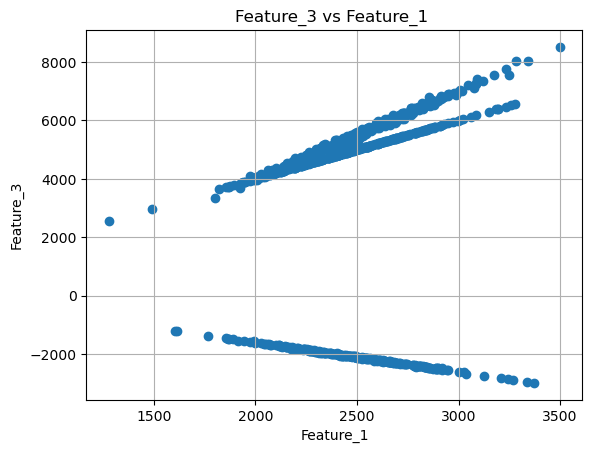

In [25]:
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.grid(True)
axes.set_xlabel("Feature_1")
axes.set_ylabel("Feature_3")
axes.set_title("Feature_3 vs Feature_1 ")
axes.scatter(df['Feature_1'], df['Feature_3'])

4. Write your constructed dataframe/tibble to a csv file called fake_data.csv.

In [26]:
df.to_csv('fake_data.csv', index=False)